In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


/Users/ekpease/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Sales and revenue, Aggregated - .xlsx file
# https://www.eia.gov/electricity/data/eia861m/index.html

test = pd.read_excel('/Users/ekpease/Data/sales_revenue.xlsx',header=2,skip_footer=1)

In [3]:
# Move data into a dictionary

npIfy = test.as_matrix()
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

dataKeys = ['State','Year','Month','MonthsSinceStart1990',\
            'Revenue_Res','Sales_Res','Customers_Res','Price_Res',\
            'Revenue_Com','Sales_Com','Customers_Com','Price_Com',\
            'Revenue_Ind','Sales_Ind','Customers_Ind','Price_Ind',\
            'Revenue_Trans','Sales_Trans','Customers_Trans','Price_Trans',\
            'Revenue_Other','Sales_Other','Customers_Other','Price_Other',\
            'Revenue_Total','Sales_Total','Customers_Total','Price_Total']
data = {key: [] for key in dataKeys}
for ii in range(len(npIfy)):
    if npIfy[ii,3]=='Final':
        data['State'].append(short_state_names[npIfy[ii,2]])
        data['Year'].append(int(npIfy[ii,0]))
        data['Month'].append(int(npIfy[ii,1]))
        data['MonthsSinceStart1990'].append(int((npIfy[ii,0]-1990)*12 + npIfy[ii,1]))
        for jj in range(4,28):
            if npIfy[ii,jj]=='.':
                data[dataKeys[jj]].append(0)
            else:
                data[dataKeys[jj]].append(float(npIfy[ii,jj]))
for key in dataKeys:
    data[key] = np.asarray(data[key])

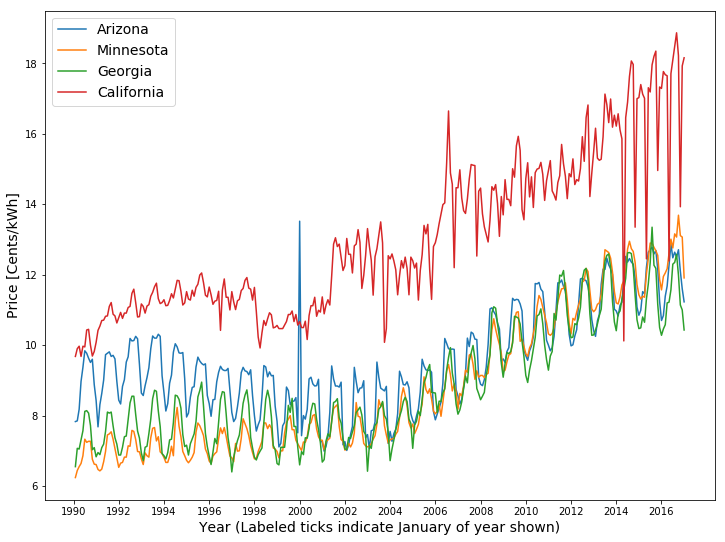

In [4]:
# Plot price evolution

fig = plt.figure()
cm = plt.get_cmap('winter')
ax = fig.add_subplot(111)
for state in ['Arizona','Minnesota','Georgia','California']:
    ax.plot(data['MonthsSinceStart1990'][data['State']==state],data['Price_Res'][data['State']==state],'-',label=state)
ax.set_xticks([0,24,48,72,96,120,144,168,192,216,240,264,288,312])
ax.set_xticklabels(['1990','1992','1994','1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016']);
ax.legend(fontsize=14)
ax.set_ylabel('Price [Cents/kWh]',fontsize=14);
ax.set_xlabel('Year (Labeled ticks indicate January of year shown)',fontsize=14);